<a href="https://colab.research.google.com/github/vonvolous/python_AI_lecture/blob/main/lecture_code/DL002_Tensorflow_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow & Keras를 이용한DNN (Deep Neural Network)**

## **1. Keras의 개요**

### 1-1. Keras란?

- 딥러닝 모델을 구축, 교육, 평가 및 실행을 위한 오픈 소스 신경망 라이브러리입
- 파이썬으로 작성되었음
- TensorFlow, CNTK, 혹은 Theano와 같은 저수준 딥러닝 프레임워크 위에서 동작함
- TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 고수준 API로 채택되어 직접적인 지원을 받고 있음

### 1-2. Keras의 주요 특징

- 사용자 친화적
	- Keras는 일반적인 사용 사례를 단순화하여 딥러닝의 복잡성을 줄이는 데 중점을 둠
	- 코드가 짧고 가독성이 좋음
	- 쉬운 프로토타이핑이 가능함
- 모듈화 및 구성 가능성
	- Keras의 핵심 개념은 모듈의 연결을 통해 복잡한 아키텍처를 구성하는 것
	- 레이어, 손실 함수, 최적화 알고리즘, 초기화 스키마, 활성화 함수 및 정규화 스키마는 모두 독립적인 모듈로 사용할 수 있음
    - 또한 새로운 모델을 만드는 데 이러한 구성 요소를 쉽게 연결할 수 있음
- 쉬운 확장성
	- 새로운 레이어, 메트릭, 손실 함수 등을 직접 구현하고 연결할 수 있음
	- 기존 구성 요소와도 호환됨
- 멀티 백엔드 지원
	- 다양한 딥러닝 엔진 위에서 Keras를 사용할 수 있으므로, 코드를 한 엔진에서 다른 엔진으로 쉽게 마이그레이션 할 수 있음

### 1-3. Keras의 주요 구성 요소

- 모델: Keras에서는 Sequential 모델과 함수형 API를 통해 복잡한 모델을 구축할 수 있음
	- Sequential 모델: 레이어의 선형 스택을 만들기 쉽게 해줌
	- 함수형 API: 다중 입력, 다중 출력, 공유 레이어, 비선형 연결 패턴 등 복잡한 아키텍처를 구성할 수 있음
	- 레이어
        - 레이어는 신경망의 핵심 구성 요소로, 가중치와 활성화 함수 등을 포함함
        - Keras에는 다양한 레이어가 사전 정의되어 있으며 사용자 정의 레이어도 쉽게 추가할 수 있음
	- 컴파일 및 훈련
        - 모델을 컴파일하려면 손실 함수와 최적화 알고리즘을 선택해야 함
        - 훈련 중에 평가할 메트릭도 선택할 수 있음
        - 훈련은 fit 메서드를 사용하여 진행할 수 있음
        - 검증 세트를 사용해 과적합을 모니터링할 수 있음
	- 모델 평가 및 예측
        - evaluate 및 predict 메서드를 사용
        - 새로운 데이터에서 모델의 성능을 평가하거나 예측을 생성할 수 있음
- Keras는...
    - 강력한 유연성과 직관성을 갖춘 도구
    - 초보자부터 전문가까지 다양한 사용자에게 적합함
    - 연구에서 산업 현장에 이르기까지 다양한 분야에서 사용됨

## **2. Keras를 이용한 DNN 모델 개발**

### 2-1. Sequence 모델

#### 2-1-1. Sequence 모델의 사용

- Sequential 모델이 적합한 경우
	- Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합함

- Sequential 모델이 적합하지 않은 경우
	- 모델에 다중 입력 또는 다중 출력이 있을 때
	- 레이어에 다중 입력 또는 다중 출력이 있을 때
	- 레이어 공유를 해야 할 때
	- 비선형 토폴로지(예: 잔류 연결, 다중 분기 모델)를 원할 때

#### 2-1-2. Sequence 모델의 기본 형태

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input


In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [ # Dense : full connected layer
        layers.Dense(2, activation = "relu", name = "layer1"), # layers.Dense(num_node, activation, name)
        layers.Dense(3, activation = "relu", name = "layer2"),
        layers.Dense(4, name = "layer3") # 여기선 활성화함수 안 쓰고 나온 결과 바로사용함
    ]
)

# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

- Sequence 모델의 기본 형태는 다음의 함수와 동일함

In [ ]:
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.18340355,  0.10750632, -0.06256033, -0.16347338],
       [ 0.18340355,  0.10750632, -0.06256033, -0.16347338],
       [ 0.18340355,  0.10750632, -0.06256033, -0.16347338]],
      dtype=float32)>

#### 2-1-3. Sequence 모델 생성하기

- 레이어의 목록을 Sequential 생성자에 전달하여 Sequential 모델을 만들 수 있음

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

- 속한 레이어는 layers 속성을 통해 접근할 수 있음

In [ ]:
model.layers

- add() 메서드를 통해 Sequential 모델을 점진적으로 작성할 수도 있음

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

- 레이어를 제거하는 pop() 메소드의 사용
    - Sequential 모델은 레이어의 리스트와 매우 유사하게 동작함

In [ ]:
model.layers

In [ ]:
model.pop() # 제일 마지막 레이어가 pop()됨
print(model.layers)
print(len(model.layers))  # 2

[<keras.layers.core.dense.Dense object at 0x7b3661f5ea10>, <keras.layers.core.dense.Dense object at 0x7b3661f5c9a0>]
2


- Sequential 생성자
    - Sequence의 생성자는 Keras의 모든 레이어 또는 모델과 마찬가지로 name 인수를 허용함
    - 이것은 의미론적으로 유의미한 이름으로 TensorBoard 그래프에 주석을 달 때 유용함

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

#### 2-1-4. 미리 입력 형상 지정하기

- Keras의 모든 레이어는 가중치를 만들려면 입력의 형상을 알아야 함
- 다음과 같은 레이어를 만들면 처음에는 가중치가 없음

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty, 처음 초기화엔 가중치가 비어있고 학습하면서 채워짐..

[]

- 가중치는 모양이 입력의 형상에 따라 달라지기 때문에 입력에서 처음 호출될 때 가중치를 만듦
- 이것은 Sequential 모델에도 적용됨

In [ ]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_9/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.27964073,  0.6191672 ,  0.10411549],
        [-0.59789497,  0.39956534,  0.55684173],
        [-0.27628607,  0.7739481 , -0.21832538],
        [-0.82842886, -0.44618756,  0.5899221 ]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

- 입력 형상이 없는 Sequential 모델을 인스턴스화할 때는 가중치가 없기 때문에 "빌드"되지 않음(model.weights를 호출하면 오류가 발생함)
- 모델에 처음 입력 데이터가 표시되면 가중치가 생성됨

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


- 모델이 "빌드"되면, 그 내용을 표시하기 위해 summary() 메서드를 호출할 수 있음

In [ ]:
model.summary()
# tf.ones(1,4)에서 4와 2 -> 8+2(bias) == param# 10
# (1,2)와 (1,3)에서 2와 3 -> 6+3(bias) == param# 9
# ...

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (1, 2)                    10        
                                                                 
 dense_14 (Dense)            (1, 3)                    9         
                                                                 
 dense_15 (Dense)            (1, 4)                    16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


- 이러한 방식은 현재 출력 형상을 포함하여 지금까지 모델의 요약을 표시할 수 있도록 Sequential 모델을 점진적으로 빌드할 때 매우 유용할 수 있음
- 이 경우 Input 객체를 모델에 전달하여 모델의 시작 형상을 알 수 있도록 모델을 시작해야 함

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(4,))) # INput : 입력층 레이어
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


- Input 객체는 레이어가 아니므로 model.layers의 일부로 표시되지 않음

In [ ]:
model.layers

- 간단한 대안은 첫 번째 레이어에 input_shape 인수를 전달하는 것

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


- 이처럼 사전 정의된 입력 모양으로 빌드된 모델은 항상 가중치를 가지며(데이터를 보기 전에도) 항상 정의된 출력 형상을 가짐
- 일반적으로 Sequential 모델의 입력 형상을 알고 있는 경우 항상 Sequential 모델의 입력 형상을 지정하는 것이 좋음

#### 2-1-5. 일반적인 디버깅 워크플로우: add() + summary()

- 새로운 Sequential 아키텍처를 구축할 때는 add() 하여 레이어를 점진적으로 쌓고 모델 요약을 자주 인쇄하는 것이 유용함
    - 예: Conv2D 및 MaxPooling2D 레이어의 스택이 이미지 특성 맵을 다운 샘플링 하는 방법을 모니터링할 수 있음

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 123, 123, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 123, 123, 32)      2432      
                          

#### 2-1-6. 모델이 완성되면 해야 할 일

- 모델을 훈련시키고 평가하며 추론을 실행함
- 모델을 디스크에 저장하고 복구함
- 다중 GPU를 활용하여 모델 훈련 속도를 향상 시킴

#### 2-1-7. Sequential 모델을 사용한 특성 추출

- Sequential 모델이 빌드되면 Functional API 모델처럼 동작함
- 이는 모든 레이어가 input 및 output 속성을 갖는다는 것을 의미함
- 이러한 속성을 사용하면 Sequential 모델 내의 모든 중간 레이어들의 출력을 추출하는 모델을 빠르게 생성하는 등 깔끔한 작업을 수행할 수 있음

In [ ]:
initial_model = keras.Sequential( # sequential에는 inputs와 output이 있음
    [
        layers.Input(shape = (250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"), #filter kernel_size strides(건너뛰기) padding
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)

In [ ]:
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

In [ ]:
# Call feature extractor on test input.
x = tf.ones([1, 250, 250, 3]) # 3차원에 차원을 하나 추가해놓음
features = feature_extractor(x)
features

[<tf.Tensor: shape=(1, 123, 123, 32), dtype=float32, numpy=
 array([[[[0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          ...,
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ]],
 
         [[0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          [0.        , 0.00275289, 0.        , ..., 0.7168796 ,
           0.398851  , 0.        ],
          ...,
       

- 한 레이어에서 특성만 추출하는 것과 유사한 예

In [ ]:
initial_model = keras.Sequential(
    [
        layers.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output, # 특정 레이어만 지정함!!
)
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

### 2-2. 함수형 API

- Keras 함수형 API는 tf.keras.Sequential API보다 더 유연한 모델을 생성하는 방법
- 함수형 API는 비선형 토폴로지, 공유 레이어, 심지어 여러 입력 또는 출력이 있는 모델을 처리할 수 있음

#### 2-2-1 함수형 API의 주요 개념

- 딥 러닝 모델은 일반적으로 레이어의 DAG(directed acyclic graph)이다.
- 따라서 함수형 API는 레이어의 그래프를 빌드하는 방법이다.

#### 2-2-2. 함수형 API를 이용하여 모델 빌드하기

- 세 개의 레이어가 있는 기본 그래프 모델
```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

- 먼저 입력 노드를 작성함
    - 데이터의 모양은 784 차원 벡터로 설정
    - 각 샘플의 모양만 지정되므로 배치 크기는 항상 생략

In [11]:
inputs = layers.Input(shape=(784,))

In [12]:
# (32, 32, 3) 모양의 이미지 입력이있는 경우
img_inputs = layers.Input(shape=(32, 32, 3))

- 리턴되는 inputs 에는 모델에 공급하는 입력 데이터의 모양 및 dtype 에 대한 정보가 포함됨

In [13]:
inputs.shape

TensorShape([None, 784])

In [14]:
inputs.dtype

tf.float32

- inputs 객체에서 레이어를 호출하여 레이어 그래프에서 새 노드를 만듦
    - "레이어 호출" 동작은 "입력"에서 생성된 레이어로 화살표를 그리는 것과 동일함
    - 입력을 dense 레이어로 "전달"하고 x를 출력으로 가져옴

In [15]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

- 레이어 그래프에 출력을 위한 레이어 추가

In [16]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

- 레이어 그래프에서 입력 및 출력을 지정하여 Model 작성

In [17]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

- 모델 요약을 통해 모델 확인

In [18]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


- 그래프 플롯을 통해 모델을 확인하고자 한다면...

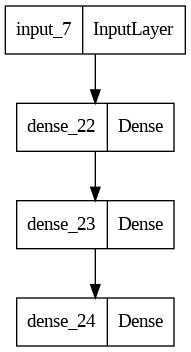

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

- 선택적으로 플롯 된 그래프에 각 레이어의 입력 및 출력 모양을 표시하려면...
    - 이 그림과 코드는 거의 동일함
    - 코드 버전에서 연결 화살표는 호출 작업으로 대체

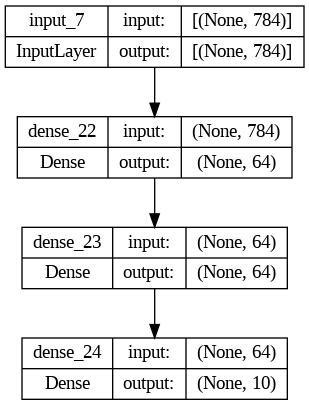

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

- 레이어 그래프는 딥 러닝 모델을 위한 직관적인 이미지
- 함수형 API는 이를 밀접하게 반영하는 모델을 만드는 방법임

#### 2-2-3. 훈련, 평가 및 예측

- 훈련(학습), 평가 및 예측(추론)은 Sequential 모델과 같이 함수형 API를 사용하여 빌드된 모델에 대해 같은 방식으로 작동함
- Model 클래스
    - 내장 훈련 루프(fit() 메서드) 제공
    - 내장 평가 루프(evaluate() 메서드)를 제공
    - 내장 추론 루프(predict() 메서드)를 제공
    - 이러한 루프를 사용자 정의하여 학습 루틴을 구현 가능

- MNIST 데이터셋으로 실습하기
    1. MNIST 이미지 데이터 로드
    2. 벡터로 재구성
    3. 데이터에 모델을 맞추기 (유효성 분할에서 성능을 모니터링하는 동안)
    4. 테스트 데이터를 이용하여 모델 평가

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # mnist data download

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255 # 총 이미지 개수 6만개를 벡터로 재구성(784) astype()으로 형태 바꿔주기
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [19]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 손실함수
    optimizer = keras.optimizers.RMSprop(),
    metrics = ["accuracy"],
)

In [20]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2) # 학습

Epoch 1/2
750/750 [==============================] - 3s 4ms/step - loss: 0.3524 - accuracy: 0.9015 - val_loss: 0.2014 - val_accuracy: 0.9430
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1718 - accuracy: 0.9499 - val_loss: 0.1510 - val_accuracy: 0.9567


In [21]:
test_scores = model.evaluate(x_test, y_test, verbose = 2) # verbose 상세 표시
print("Test loss: ", test_scores[0])
print("Test accuracy: ", test_scores[1])

313/313 - 0s - loss: 0.1410 - accuracy: 0.9582 - 435ms/epoch - 1ms/step
Test loss:  0.14099402725696564
Test accuracy:  0.9581999778747559


In [22]:
# 모델 예측
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[-4.0636325e+00, -5.3118401e+00,  1.3547751e+00, ...,
         9.9967766e+00, -4.5579534e+00,  3.6595398e-01],
       [-7.1775789e+00,  4.0729613e+00,  1.2801782e+01, ...,
        -7.9313898e+00,  6.8763748e-02, -6.3049479e+00],
       [-4.6305542e+00,  7.4965730e+00,  9.1144592e-01, ...,
        -3.9369965e-01, -8.5655874e-01, -3.0272167e+00],
       ...,
       [-8.2832394e+00, -9.8981915e+00, -5.1408839e+00, ...,
        -2.1744401e+00, -9.0005621e-04,  4.0509186e+00],
       [-3.9122329e+00, -2.3019619e+00, -7.3126564e+00, ...,
        -9.1675005e+00,  2.1325681e+00, -6.1494856e+00],
       [-1.2973090e+00, -7.0236392e+00,  2.6239259e+00, ...,
        -1.2132148e+01, -7.1713910e+00, -8.2086573e+00]], dtype=float32)

#### 2-2-4. 저장 및 직렬화

- 저장 및 직렬화 작업
    - 함수형 API를 사용
    - 빌드된 모델에 대해 Sequential 모델을 사용할 때와 같은 방식으로 작동
    - 함수형 모델을 저장하는 표준 방법: model.save()를 호출하여 전체 모델을 단일 파일로 저장
    - 모델을 빌드한 코드를 더 이상 사용할 수 없는 경우에도 나중에 이 파일에서 같은 모델을 로드하여 다시 작성할 수 있음

- 저장된 파일에 포함되는 것
    - 모델 아키텍처
    - 모델 중량 값 (훈련 중 학습 된 값)
    - 모델 훈련 구성(있는 경우, compile로 전달)
    - 옵티마이저 및 상태(있는 경우, 중단한 곳에서 훈련을 다시 시작)

In [23]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

#### 2-2-5. 같은 레이어 그래프를 사용하여 여러 모델 정의하기

- 함수형 API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성됨
- 단일 레이어 그래프를 사용하여 여러 모델을 생성할 수 있음

- 예시
    - 이미지 입력을 16차원 벡터로 변환하는 encoder 모델과 훈련을 위한 엔드 투 엔드 autoencoder 모델
    - 같은 레이어 스택을 사용하여 두 모델을 인스턴스화
    - 디코딩 아키텍처는 인코딩 아키텍처와 완전하게 대칭이므로 출력 형상은 입력 형상 (28, 28, 1)과 같음
    - 디코더에서 인코더의 Conv2D 층과 반대되는 층은 Conv2DTranspose 층,  MaxPooling2D 층과 반대되는 층은 UpSampling2D 층

In [24]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

#### 2-2-6. 모델 호출하기

- 모든 모델은 레이어와 마찬가지로 호출이 가능함
- Input 또는 또 다른 레이어의 출력에서 모델을 호출함으로써 모델을 마치 레이어와 같이 취급할 수 있음
- 모델을 호출함으로써 모델의 아키텍처를 재사용할 뿐만 아니라 가중치도 재사용 할 수 있음

- 예시 (앞선 autoencoder 모델 예제에 대한 또 다른 설명)
    - 인코더 모델과 디코더 모델을 만들고
    - 두 번의 호출로 연결하여
    - 자동 인코더(autoencoder) 모델 만들기

In [25]:
encoder_input = keras.Input(shape=(28,28,1), name = "original_img")
x = layers.Conv2D(16,3,activation="relu")(encoder_input)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.Conv2D(16,3,activation="relu")(x)
encoder_output = layers.GlobalAveragePooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name = "encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [26]:
decoder_input = keras.Input(shape=(16,), name = "encoded_img")
x = layers.Reshape((4,4,1))(decoder_input)
x = layers.Conv2DTranspose(16,3,activation = "relu")(x)
x = layers.Conv2DTranspose(32,3,activation = "relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16,3,activation = "relu")(x)
decoder_output = layers.Conv2DTranspose(1,3,activation = "relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name = "decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_img (InputLayer)    [(None, 16)]              0         
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 6, 6, 16)         160       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 8, 8, 32)         4640      
 ranspose)                                                       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                           

In [27]:
autoencoder_input = keras.Input(shape=(28,28,1), name = "img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


- 모델은 레이어와 유사하므로
    - 모델은 중첩될 수 있음
    - 모델은 하위 모델을 포함할 수 있음
    - 모델 중첩의 일반적인 사용 사례는 앙상블 기법(ensembling)

- 예시
    - 모델 세트를 단일 모델로 앙상블하여 예측을 평균화하는 방법

In [28]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

In [29]:
model1 = get_model()
model2 = get_model()
model3 = get_model()

In [30]:
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs = inputs, outputs = outputs)

In [31]:
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 model (Functional)             (None, 1)            129         ['input_6[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 1)            129         ['input_6[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 1)            129         ['input_6[0][0]']                
                                                                                            

#### 2-2-7. 복잡한 그래프 토폴로지 조작하기

##### 2-2-7-1. 여러 입력 및 출력을 가진 모델

- 함수형 API를 사용하면 다중 입력 및 출력을 쉽게 조작할 수 있음
- Sequential API로는 처리할 수 ​​없음

##### 2-2-7-2. 예시(1)

- 우선 순위별로 사용자 지정 발급 티켓 순위를 매기고 올바른 부서로 라우팅하는 시스템을 구축하는 경우
    - 세 가지의 입력
        - 티켓의 제목 (텍스트 입력)
        - 티켓의 본문 (텍스트 입력)
        - 사용자가 추가 한 모든 태그 (범주 입력)
    - 두 가지의 출력
        - 0과 1 사이의 우선 순위 점수 (스칼라 시그 모이 드 출력)
        - 티켓을 처리해야하는 부서 (부서 세트에 대한 softmax 출력)


In [44]:
num_tags = 12 # Number of unique issue tags
num_words = 10000 # Size of vocabulary obtained when preprocessing text data
num_departments = 4 # Number of departments for predictions

In [45]:
title_input = keras.Input(shape=(None,), name = "title") # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name = "body")  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name = "tags") # Binary vectors of size `num_tags`

In [46]:
# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)

# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

In [47]:
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)

# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

In [48]:
# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

In [49]:
# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name = "priority")(x)

# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name = "department")(x)

In [50]:
# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

In [51]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, None)]       0           []                               
                                                                                                  
 body (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, None, 64)     640000      ['title[0][0]']                  
                                                                                                  
 embedding_5 (Embedding)        (None, None, 64)     640000      ['body[0][0]']                   
                                                                                            

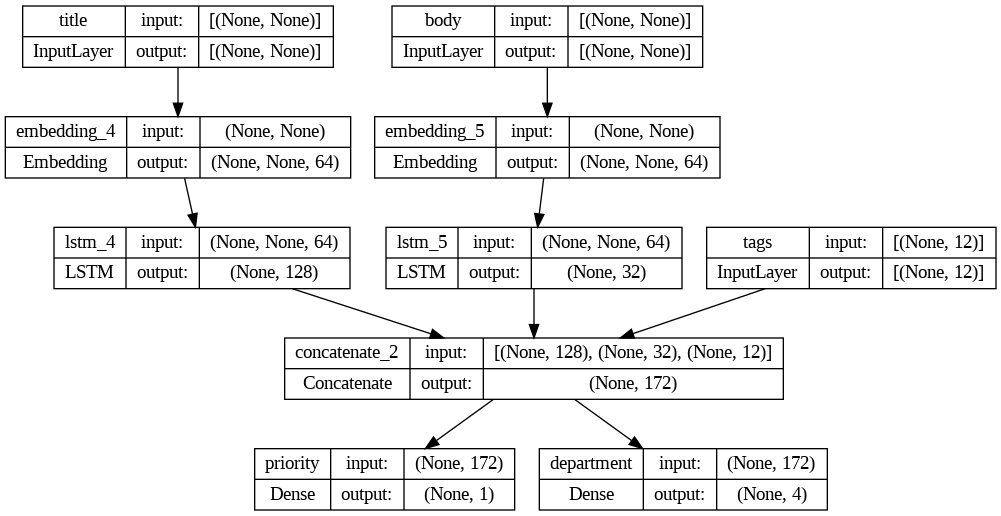

In [52]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

- 모델을 컴파일 할 때 각 출력에 서로 다른 손실을 할당 할 수 있음
- 각 손실에 다른 가중치를 할당하여 총 훈련 손실에 대한 기여도를 조정할 수 있음

In [53]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

- 출력 레이어의 이름이 다를 경우 손실과 손실 가중치를 레이어의 이름에 맞게 특정할 수 있음

In [54]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

- 입력 및 목표치의 NumPy 배열 목록을 전달하여 모델 훈련

In [55]:
import numpy as np

In [56]:
# Dummy input data
title_data = np.random.randint(num_words, size = (1280, 10))
body_data = np.random.randint(num_words, size = (1280,100))
tags_data = np.random.randint(2, size = (1280, num_tags)).astype("float32")

In [57]:
# Dummy target data
priority_targets = np.random.random(size = (1280, 1))
dept_targets = np.random.randint(2, size = (1280, num_departments))

In [59]:
model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs = 2,
    batch_size = 32,
)

Epoch 1/2
40/40 [==============================] - 8s 80ms/step - loss: 1.2732 - priority_loss: 0.7024 - department_loss: 2.8538
Epoch 2/2
40/40 [==============================] - 2s 56ms/step - loss: 1.2739 - priority_loss: 0.7005 - department_loss: 2.8670


- Dataset 객체에 맞춰 호출할 때의 산출물
    - 리스트의 튜플 형태
        - ([title_data, body_data, tags_data], [priority_targets, dept_targets])
    - 딕셔너리의 튜플 형태
        - ({'title': title_data, 'body': body_data, 'tags': tags_data}, {'priority': priority_targets, 'department': dept_targets})

##### 2-2-7-3. 예시(2)

- Toy ResNet 모델
    - 입력 및 출력이 여러 개인 모델 외에도 함수형 API를 사용하면 비선형 연결 토폴로지를 쉽게 조작할 수 있음
    - ResNet 모델은 순차적으로 연결되지 않은 레이어가 있는 모델이며 Sequential API가 처리할 수 없는 모델임
    - ToyRestNet 모델은 잔차 연결(residual connections)이 적용됨
    

In [60]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_8[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_9[0][0]']               
                                                                                         

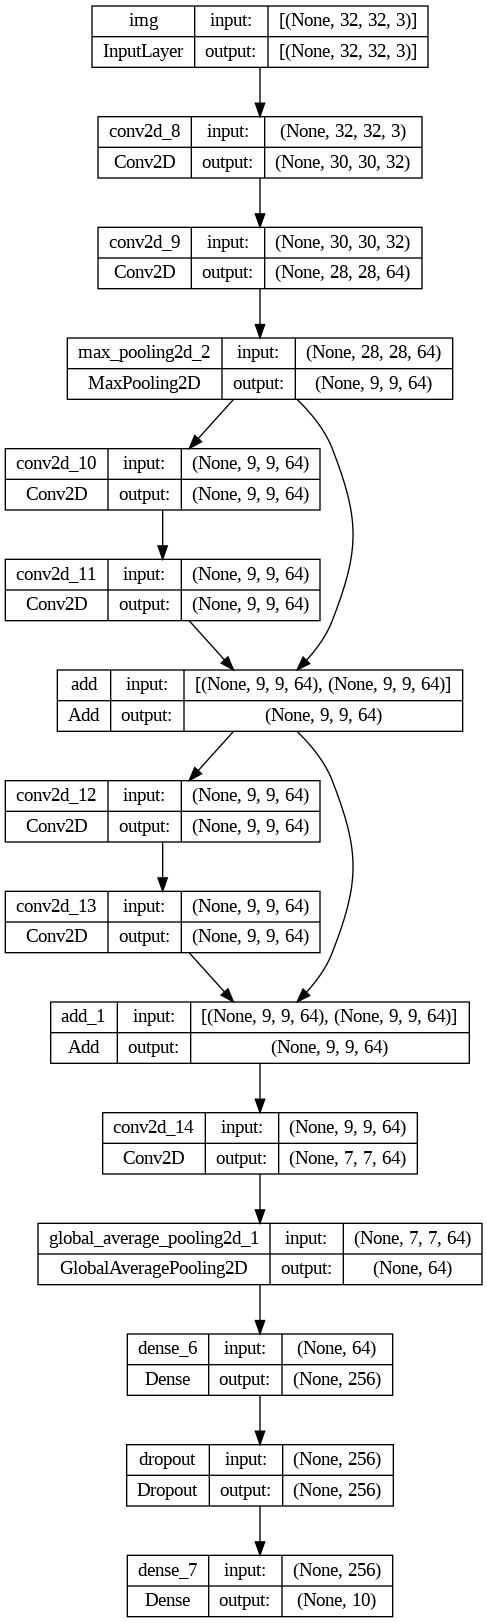

In [61]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

- CIFAR10 데이터셋을 적용하여 모델 훈련하기

In [62]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 7s 447ms/step - loss: 2.2985 - acc: 0.1225 - val_loss: 2.4021 - val_acc: 0.0850


### 2-3. 내장 메서드를 사용한 학습 및 평가

#### 2-3-1. 모델 훈련 및 유효성 검사

- 모델 훈련 및 유효성 검사는 모든 종류의 Keras 모델에서 완전히 동일하게 작동함
- 훈련 및 유효성 검증을 위한 내장 API의 사용
    - 훈련: model.fit()
    - 평가: model.evaluate()
    - 예측(추론): model.predict()

#### 2-3-2. End-to-End 모델 예시

- 일반적인 엔드 투 엔드 워크플로의 구성
    - 훈련
    - 원래 훈련 데이터에서 생성된 홀드아웃 세트에 대한 유효성 검사
    - 테스트 데이터에 대한 평가

##### 2-3-2-1. 데이터 구성

- 데이터를 모델의 내장 훈련 루프로 전달할 때
    - NumPy 배열(데이터가 작고 메모리에 맞는 경우) 또는 tf.data Dataset 객체를 사용

In [63]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

- 옵티마이저, 손실 및 메트릭을 사용하는 방법을 보여주기 위해 MNIST 데이터세트를 NumPy 배열로 사용함

In [64]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

##### 2-3-2-2. 훈련 구성

- 최적화 프로그램, 손실, 메트릭 지정
- compile() 메서드 호출
    - 손실, 메트릭 및 최적화 프로그램 지정하기
        - fit()으로 모델을 훈련시키려면 손실 함수, 최적화 프로그램, 그리고 선택적으로 모니터링할 일부 메트릭을 지정해야 함
    - metrics 인수는 List
        - 모델의 메트릭 수는 여러 개도 가능함
    - 모델에 여러 개의 출력이 있는 경우
        - 각 출력에 대해 서로 다른 손실 및 메트릭을 지정
        - 모델의 총 손실에 대한 각 출력의 기여도를 조정 가능
- 이러한 내용은 compile() 메서드에 대한 인수로 모델에 전달함

In [65]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [66]:
# 또 다른 방법
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

- 재사용하기 위해 모델 정의와 컴파일 단계를 함수에 넣을 수 있음

In [67]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [68]:
def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

- 다양한 내장 최적화 프로그램, 손실 및 메트릭 사용 가능
    - 최적화 프로그램:
        - SGD()(모멘텀이 있거나 없음)
        - RMSprop()
        - Adam()
        - 기타
    - 손실:
        - MeanSquaredError()
        - KLDivergence()
        - CosineSimilarity()
        - 기타
    - 메트릭:
        - AUC()
        - Precision()
        - Recall()
        - 기타       

##### 2-3-2-3. 모델 훈련

- fit() 호출
- 데이터를 batch_size 크기의 "배치"로 분할
- 지정된 수의 epochs에 대해 전체 데이터세트를 반복 처리

In [69]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 3s 4ms/step - loss: 0.3445 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.1888 - val_sparse_categorical_accuracy: 0.9459
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9530 - val_loss: 0.1538 - val_sparse_categorical_accuracy: 0.9556


- 반환되는 history 객체는 훈련 중 손실 값과 메트릭 값에 대한 레코드를 유지하고 있음

In [70]:
history.history

{'loss': [0.34450364112854004, 0.159138023853302],
 'sparse_categorical_accuracy': [0.9010400176048279, 0.9529600143432617],
 'val_loss': [0.18881399929523468, 0.1537591814994812],
 'val_sparse_categorical_accuracy': [0.945900022983551, 0.9556000232696533]}

##### 2-3-2-4. 모델 평가

- evaluate() 호출
- 테스트 데이터에 대하여 모델 평가 수행

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 5ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9601
test loss, test acc: [0.13228842616081238, 0.960099995136261]
Generate predictions for 3 samples
1/1 [==============================] - 0s 184ms/step
predictions shape: (3, 10)


#### 2-3-3. 콜백 사용하기

- 콜백(Callback)
    - 훈련 중 다른 시점(epoch의 시작, 배치의 끝, epoch의 끝 등)에서 호출되며 다음과 같은 특정 동작을 구현하는 데 사용할 수 있는 객체
- 콜백의 기능
    - 훈련 중 서로 다른 시점에서 유효성 검사 수행(내장된 epoch당 유효성 검사에서 더욱 확장)
    - 정기적으로 또는 특정 정확도 임계값을 초과할 때 모델 검사점 설정
    - 훈련이 평탄해진 것으로 보일 때 모델의 학습률 변경
    - 훈련이 평탄해진 것으로 보일 때 최상위 레이어의 미세 조정 수행
    - 훈련이 종료되거나 특정 성능 임계값이 초과된 경우 이메일 또는 인스턴트 메시지로 알림 보내기
    - 기타
- 콜백은 fit()에 대한 호출에 목록으로 전달할 수 있음

In [71]:
model = get_compiled_model()

# callbacks 설정해주기
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

# 모델 훈련
model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 0.3794 - sparse_categorical_accuracy: 0.8928 - val_loss: 0.2405 - val_sparse_categorical_accuracy: 0.9276
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9491 - val_loss: 0.1964 - val_sparse_categorical_accuracy: 0.9398
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1289 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.1522 - val_sparse_categorical_accuracy: 0.9553
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9698 - val_loss: 0.1436 - val_sparse_categorical_accuracy: 0.9593
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.1323 - val_sparse_categorical_accuracy: 0.9615
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0691 - sparse_categorica

- 다양한 내장 콜백을 사용 가능
	- ModelCheckpoint: 주기적으로 모델 저장
	- EarlyStopping: 훈련이 더 이상 유효성 검사 메트릭을 개선하지 못하는 경우 훈련 중단
	- TensorBoard: TensorBoard에서 시각화할 수 있는 모델 로그를 정기적으로 작성
	- CSVLogger: 손실 및 메트릭 데이터를 CSV 파일로 스트리밍
	- 기타

#### 2-3-4. 모델 검사점 설정하기

- 상대적으로 큰 데이터셋에 대한 모델을 훈련시킬 때는 모델의 검사점을 빈번하게 저장하는 것이 중요함
- ModelCheckpoint 콜백 사용(가장 쉬운 방법)
    - 내결함성 구현 가능
    - 즉, 훈련이 무작위로 중단되는 경우 모델의 마지막 저장된 상태에서 훈련을 다시 시작할 수 있음

In [72]:
model = get_compiled_model()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="mymodel_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
model.fit(
    x_train, y_train, epochs=2, batch_size=64, callbacks=callbacks, validation_split=0.2
)

Epoch 1/2
620/625 [============================>.] - ETA: 0s - loss: 0.3946 - sparse_categorical_accuracy: 0.8880
Epoch 1: val_loss improved from inf to 0.23918, saving model to mymodel_1


625/625 [==============================] - 7s 11ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.2392 - val_sparse_categorical_accuracy: 0.9297
Epoch 2/2
623/625 [============================>.] - ETA: 0s - loss: 0.1800 - sparse_categorical_accuracy: 0.9474
Epoch 2: val_loss improved from 0.23918 to 0.19523, saving model to mymodel_2


625/625 [==============================] - 3s 5ms/step - loss: 0.1799 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1952 - val_sparse_categorical_accuracy: 0.9405


In [73]:
# 내결함성 구현의 예

import os

# Prepare a directory to store all the checkpoints.
checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()


model = make_or_restore_model()
callbacks = [
    # This callback saves a SavedModel every 100 batches.
    # We include the training loss in the saved model name.
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + "/ckpt-loss={loss:.2f}", save_freq=100
    )
]
model.fit(x_train, y_train, epochs=1, callbacks=callbacks)

Creating a new model
  90/1563 [>.............................] - ETA: 4s - loss: 1.0385 - sparse_categorical_accuracy: 0.7229

 190/1563 [==>...........................] - ETA: 8s - loss: 0.7221 - sparse_categorical_accuracy: 0.8038

 287/1563 [====>.........................] - ETA: 9s - loss: 0.6078 - sparse_categorical_accuracy: 0.8323

 397/1563 [======>.......................] - ETA: 8s - loss: 0.5359 - sparse_categorical_accuracy: 0.8501

 499/1563 [========>.....................] - ETA: 8s - loss: 0.4873 - sparse_categorical_accuracy: 0.8625

 591/1563 [==========>...................] - ETA: 8s - loss: 0.4580 - sparse_categorical_accuracy: 0.8699

 685/1563 [============>.................] - ETA: 8s - loss: 0.4292 - sparse_categorical_accuracy: 0.8777

 789/1563 [==============>...............] - ETA: 7s - loss: 0.4046 - sparse_categorical_accuracy: 0.8843

 891/1563 [================>.............] - ETA: 6s - loss: 0.3853 - sparse_categorical_accuracy: 0.8897

 997/1563 [==================>...........] - ETA: 5s - loss: 0.3672 - sparse_categorical_accuracy: 0.8944

1097/1563 [====================>.........] - ETA: 4s - loss: 0.3517 - sparse_categorical_accuracy: 0.8987

1197/1563 [=====================>........] - ETA: 3s - loss: 0.3378 - sparse_categorical_accuracy: 0.9026

1293/1563 [=======================>......] - ETA: 2s - loss: 0.3271 - sparse_categorical_accuracy: 0.9055

1394/1563 [=========================>....] - ETA: 1s - loss: 0.3167 - sparse_categorical_accuracy: 0.9084

1489/1563 [===========================>..] - ETA: 0s - loss: 0.3073 - sparse_categorical_accuracy: 0.9108

1563/1563 [==============================] - 16s 10ms/step - loss: 0.3009 - sparse_categorical_accuracy: 0.9127


#### 2-3-5. 학습률 일정 사용하기

- 학습률 일정(Learning Rate Schedule)
    - 딥 러닝 모델을 훈련할 때 일반적인 패턴은 훈련이 진행됨에 따라 점차적으로 학습을 줄이는 방법(학습률 감소)
    - 학습률 감소 일정
        - 정적: 현재 epoch 또는 현재 배치 인덱스의 함수로 미리 고정됨
        - 동적: 모델의 현재 동작, 특히 유효성 검사 손실에 대응

- 최적화 프로그램으로 일정 전달하기
    - 최적화 프로그램에서 schedule 객체를 learning_rate 인수로 전달하여 정적 학습률 감소 일정을 쉽게 사용할 수 있음

In [74]:
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

- 콜백을 사용하여 동적 학습률 일정 구현하기
    - 최적화 프로그램은 유효성 검사 메트릭에 액세스할 수 없으므로 이러한 일정 객체로는 동적 학습률 일정(예: 유효성 검사 손실이 더 이상 개선되지 않을 때 학습률 감소)을 달성할 수 없음
    - 콜백은 유효성 검사 메트릭을 포함해 모든 메트릭에 액세스할 수 있으므로 최적화 프로그램에서 현재 학습률을 수정하는 콜백을 사용하여 이 패턴을 달성할 수 있음
    - 실제로 이 부분이 ReduceLROnPlateau 콜백으로 내장되어 있음

    LR(learning rate)

#### 2-3-6. 훈련 중 손실 및 메트릭 시각화하기

- TensorBoard의 사용
    - TensorBoard: 로컬에서 실행할 수 있는 브라우저 기반 애플리케이션
    - 훈련 중에 모델을 주시하는 가장 좋은 방법임
- TensorBoard에서 제공하는 정보
    - 훈련 및 평가를 위한 손실 및 메트릭을 실시간으로 플롯
    - (옵션) 레이어 활성화 히스토그램 시각화
    - (옵션) Embedding 레이어에서 학습한 포함된 공간의 3D 시각화
- pip와 함께 TensorFlow를 설치한 경우, 명령줄에서 TensorBoard를 시작할 수 있음
    - CoLab에서는 권한문제로 접근불가
    - 개인 PC 환경에서 사용할 수 있음


In [77]:
# colab에선 불가능
!tensorboard --logdir=/full_path_to_your_logs

2023-08-10 02:20:34.476776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 'tensorboard.compat' (/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 39, in run_main
    main_lib.global_init()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main_lib.py", line 40, in global_init
    if getattr(tf, "__version__", "stub") == "stub":
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/lazy.py", line 65, in __getattr__
   

- TensorBoard 콜백 사용하기
    - TensorBoard를 Keras 모델 및 fit() 메서드와 함께 사용하는 가장 쉬운 방법
    - 가장 간단한 경우로, 콜백에서 로그를 작성할 위치만 지정하면 바로 로그를 작성할 수 있음

In [76]:
keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_logs",
    histogram_freq=0,  # How often to log histogram visualizations
    embeddings_freq=0,  # How often to log embedding visualizations
    update_freq="epoch",
)  # How often to write logs (default: once per epoch)